In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from prettytable import PrettyTable

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

In [2]:
my_path = 'C:\\Users\\shrey\\Desktop\\ML-DL-NLP\\Projects\\Practice\\amazon-fine-food-reviews'
df =  pd.read_csv(f'{my_path}/Reviews.csv')
data = df

In [3]:
#Removing Neural reviews
data_s = data[data['Score']!=3]

#Updating Score to 0 or 1
def partition(x):
    if x<3:
        return 0
    return 1

score_upd = data_s['Score']
temp = score_upd.map(partition)
data_s['Score'] = temp

In [4]:
final_data = data_s.drop_duplicates(subset=('UserId','ProfileName','Time','Text'))
final = final_data[final_data['HelpfulnessNumerator']<=final_data['HelpfulnessDenominator']]

In [5]:
final = final.head(250000)

In [6]:
final = final.sort_values(['Time'], axis=0)   #TIme based sorting

final_X = final['Text']
final_y = final['Score']

### ** Data preprocessing

##### stopword

##### stemming

##### Punctuations removal

In [7]:
#Splitting data into train and test
X_train = final_X[:175000]
X_test = final_X[175000:]
y_train = final_y[:175000]
y_test = final_y[175000:]

### Naive Bayes on BOW

In [8]:
count_vect = CountVectorizer(max_features = 5000)
bow_X_train = count_vect.fit_transform(X_train)
bow_X_test = count_vect.transform(X_test)

In [9]:
alphas = [0.01,0.1,1,10,100]
clf = MultinomialNB()
param_grid = { 'alpha':alphas}
grid = GridSearchCV(estimator = clf,param_grid=param_grid ,cv = 5,n_jobs = -1)
grid.fit(bow_X_train, y_train)
print("best alpha = ", grid.best_params_)
print("Accuracy on train data = ", grid.best_score_*100)
t_acc1 = grid.best_score_*100
a = grid.best_params_
optimal_a1 = a.get('alpha')

best alpha =  {'alpha': 0.1}
Accuracy on train data =  90.12857142857142


In [10]:
clf = MultinomialNB(alpha = optimal_a1)

clf.fit(bow_X_train,y_train)

pred = clf.predict(bow_X_test)

acc1 = accuracy_score(y_test, pred) * 100
pre1 = precision_score(y_test, pred) * 100
rec1 = recall_score(y_test, pred) * 100
f11 = f1_score(y_test, pred) * 100

print('\nAccuracy=%f%%' % (acc1))
print('\nprecision=%f%%' % (pre1))
print('\nrecall=%f%%' % (rec1))
print('\nF1-Score=%f%%' % (f11))

cm = confusion_matrix(y_test,pred)
print("\n",cm)


Accuracy=89.057333%

precision=94.950900%

recall=91.602942%

F1-Score=93.246879%

 [[10132  3013]
 [ 5194 56661]]


In [11]:
negative_log = list(map(abs,clf.feature_log_prob_))[0].argsort()[0:10]
positive_log = list(map(abs,clf.feature_log_prob_))[1].argsort()[0:10]

In [12]:
print("Indices of most negative impacting words = ", negative_log)
print("Indices of most negative impacting words = ", positive_log)

Indices of most negative impacting words =  [4462  235 2300 4527 2990 4489  558 2293 2223 2936]
Indices of most negative impacting words =  [4462  235 2300 4527 2990 2293 4489  558 2223 1748]


In [13]:

print("Positve impacting words")
for index in positive_log:
    for i in count_vect.vocabulary_:
        if count_vect.vocabulary_[i] == index:
            print(i)

Positve impacting words
the
and
it
to
of
is
this
br
in
for


In [14]:
print("negative impacting words")
for index in negative_log:
    for i in count_vect.vocabulary_:
        if count_vect.vocabulary_[i] == index:
            print(i)

negative impacting words
the
and
it
to
of
this
br
is
in
not


### Naive bayes on Tf-Idf

In [15]:
tf_idf = TfidfVectorizer(max_features=5000)
tf_X_train = tf_idf.fit_transform(X_train)
tf_X_test = tf_idf.transform(X_test)

In [16]:
alphas = [0.01,0.1,1,10,100]
clf = MultinomialNB()
param_grid = { 'alpha':alphas}
grid = GridSearchCV(estimator = clf,param_grid=param_grid ,cv = 5,n_jobs = -1)
grid.fit(tf_X_train, y_train)
print("best alpha = ", grid.best_params_)
print("Accuracy on train data = ", grid.best_score_*100)
t_acc2 = grid.best_score_*100
a = grid.best_params_
optimal_a2 = a.get('alpha')

best alpha =  {'alpha': 0.01}
Accuracy on train data =  87.9617142857143


In [17]:
clf = MultinomialNB(alpha = optimal_a2)

clf.fit(bow_X_train,y_train)

pred = clf.predict(bow_X_test)

acc2 = accuracy_score(y_test, pred) * 100
pre2 = precision_score(y_test, pred) * 100
rec2 = recall_score(y_test, pred) * 100
f12 = f1_score(y_test, pred) * 100

print('\nAccuracy=%f%%' % (acc2))
print('\nprecision=%f%%' % (pre2))
print('\nrecall=%f%%' % (rec2))
print('\nF1-Score=%f%%' % (f12))

cm = confusion_matrix(y_test,pred)
print("\n",cm)


Accuracy=89.060000%

precision=94.951069%

recall=91.606176%

F1-Score=93.248636%

 [[10132  3013]
 [ 5192 56663]]


In [18]:
negative_log = list(map(abs,clf.feature_log_prob_))[0].argsort()[0:10]
positive_log = list(map(abs,clf.feature_log_prob_))[1].argsort()[0:10]

In [19]:
print("Positve impacting words")
for index in positive_log:
    for i in tf_idf.vocabulary_:
        if tf_idf.vocabulary_[i] == index:
            print(i)


Positve impacting words
the
and
it
to
of
is
this
br
in
for


In [20]:
print("Negative impacting words")
for index in negative_log:
    for i in tf_idf.vocabulary_:
        if tf_idf.vocabulary_[i] == index:
            print(i)

Negative impacting words
the
and
it
to
of
this
br
is
in
not


### Metrics using PrettyTable

In [21]:
x = PrettyTable()

model_1 = 'NB on BoW'
model_2 = 'NB on Tf-Idf'
x.field_names = ["Model","Alpha","Train_Acc(%)","Train_Error(%)","Test_Acc(%)","Test_Error(%)","Precision(%)","Recall(%)","F1-Score(%)"]

t_acc1 = np.around(t_acc1, decimals = 2)
t_err1 = np.around(100-t_acc1, decimals = 2)
acc1 = np.around(acc1, decimals = 2)
err1 = np.around(100-acc1, decimals = 2) 
pre1 = np.around(pre1, decimals = 2)
rec1 = np.around(rec1, decimals = 2)
f11 = np.around(f11, decimals = 2)

t_acc2 = np.around(t_acc2, decimals = 2)
t_err2 = np.around(100-t_acc2, decimals = 2)
acc2 = np.around(acc2, decimals = 2)
err2 = np.around(100-acc2, decimals = 2) 
pre2 = np.around(pre2, decimals = 2)
rec2 = np.around(rec2, decimals = 2)
f12 = np.around(f12, decimals = 2)

x.add_row([model_1,optimal_a1,t_acc1,t_err1,acc1,err1,pre1,rec1,f11])
x.add_row([model_2,optimal_a2,t_acc2,t_err2,acc2,err2,pre2,rec2,f12])

print(x)

+--------------+-------+--------------+----------------+-------------+---------------+--------------+-----------+-------------+
|    Model     | Alpha | Train_Acc(%) | Train_Error(%) | Test_Acc(%) | Test_Error(%) | Precision(%) | Recall(%) | F1-Score(%) |
+--------------+-------+--------------+----------------+-------------+---------------+--------------+-----------+-------------+
|  NB on BoW   |  0.1  |    90.13     |      9.87      |    89.06    |     10.94     |    94.95     |    91.6   |    93.25    |
| NB on Tf-Idf |  0.01 |    87.96     |     12.04      |    89.06    |     10.94     |    94.95     |   91.61   |    93.25    |
+--------------+-------+--------------+----------------+-------------+---------------+--------------+-----------+-------------+


In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB
lam = [0.001,0.01,0.1,1,10]
clf = MultinomialNB()
skf = StratifiedKFold(n_splits=10)
params = {}
param_grid = {'C':lam}
grid = GridSearchCV(clf, cv=skf, param_grid=params, return_train_score=True)
grid.fit(bow_X_train, y_train)
print("best C = ", grid.best_params_)
print("Accuracy on train data = ", grid.best_score_*100)
a = grid.best_params_
optimal_a1 = a.get('C')

best C =  {}
Accuracy on train data =  90.13428571428571


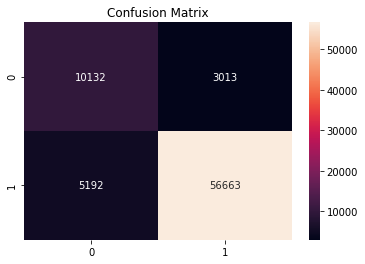

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

### Summary and Observations
#### 1.) Considered 250k data used TIME BASED SPLITIING
#### 2.) Time based splitting done with the ratio as 70:30 = train:test
#### 3.) In BoW model , got alpha= 0.1 and In Tf-Idf model alpha = 0.01.
#### 4.) Used PrettyTable to make a table of all metrics for both models
#### 5.) But if I see the both Positive and negative words that impact our model, both seems semantically similar, because those are the words that repeat most both classes